In [106]:
import warnings
warnings.filterwarnings("ignore")

### Importing the dependencies

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, estimate_bandwidth

### Data Collection & Analysis

In [108]:
#loading the data in dataframe
customer_data = pd.read_csv(r"./Mall_Customers.csv")
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [109]:
customer_data.shape

(200, 5)

In [110]:
customer_data.info()  # getting schema details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [111]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Choosing "Annual Income" & "Spending Score" column for Clustering

In [112]:
X = customer_data.iloc[:, [3,4]].values

In [113]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Choosing correct no. of cluster for K-Means

In [114]:
# by elbow method

wcss = []    # within clusters sum of squares
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=58, init="k-means++")
    kmeans = kmeans.fit(X)
    wcss.append(kmeans.inertia_)

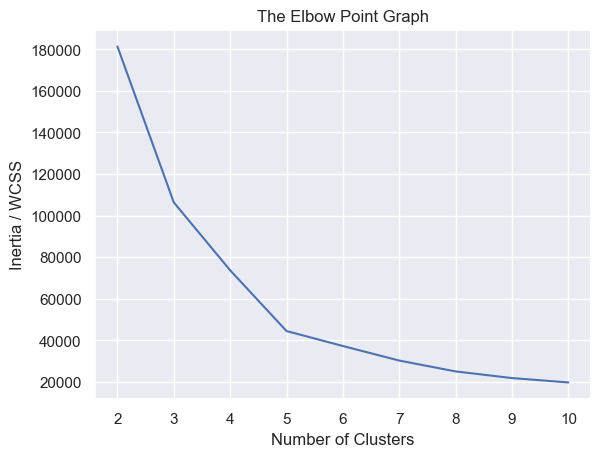

In [115]:
# plotting the elbow graph
sns.set()
plt.plot(range(2,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia / WCSS")
plt.show()

The optimum number of clusters will be "5"

### Training the k-means Clustering model

In [116]:
kmeans = KMeans(n_clusters=5, random_state=58)
kmeans = kmeans.fit(X)

y1 = kmeans.predict(X) # return label for each datapoint
y1

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

### Visualizing the Clusters

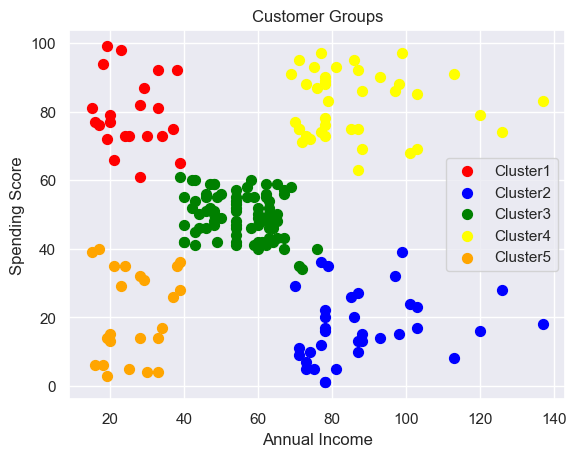

In [117]:
# plotting all the clusters & their centroids
# plt.figure(figsize=(8,8))

plt.scatter(X[y1==0,0], X[y1==0,1], s=50, c='red', label="Cluster1")
plt.scatter(X[y1==1,0], X[y1==1,1], s=50, c='blue', label="Cluster2")
plt.scatter(X[y1==2,0], X[y1==2,1], s=50, c='green', label="Cluster3")
plt.scatter(X[y1==3,0], X[y1==3,1], s=50, c='yellow', label="Cluster4")
plt.scatter(X[y1==4,0], X[y1==4,1], s=50, c='orange', label="Cluster5")

#plotting centriods
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="black", label="Centroids")
plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

### Agglomerative Clustering

In [118]:
from sklearn.cluster import AgglomerativeClustering

In [119]:
from sklearn.metrics import silhouette_score

In [120]:
sil_scores = []
for k in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=k,
                           affinity="euclidean",
                           linkage="ward")
    agg = agg.fit(X)
    y = agg.labels_
    sil_scores.append(silhouette_score(X, y))

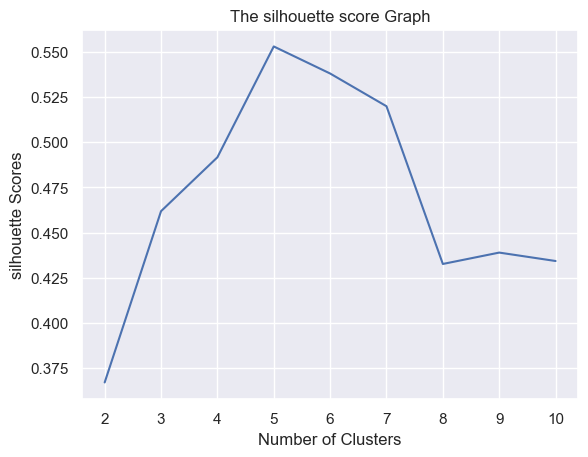

In [121]:
plt.plot(range(2,11), sil_scores)
plt.title("The silhouette score Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette Scores")
plt.show()

In [122]:
agg = AgglomerativeClustering(n_clusters=5,
                       affinity="euclidean",
                       linkage="ward")
agg = agg.fit(X)
y2 = agg.labels_

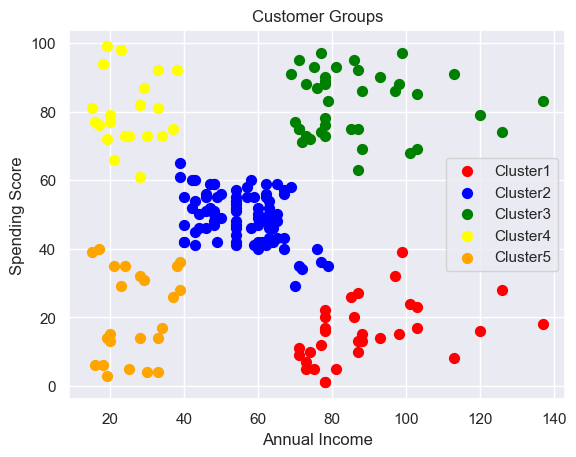

In [123]:
plt.scatter(X[y2==0,0], X[y2==0,1], s=50, c='red', label="Cluster1")
plt.scatter(X[y2==1,0], X[y2==1,1], s=50, c='blue', label="Cluster2")
plt.scatter(X[y2==2,0], X[y2==2,1], s=50, c='green', label="Cluster3")
plt.scatter(X[y2==3,0], X[y2==3,1], s=50, c='yellow', label="Cluster4")
plt.scatter(X[y2==4,0], X[y2==4,1], s=50, c='orange', label="Cluster5")

plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

### Mean Shift Algorithm

In [124]:
from sklearn.cluster import MeanShift,estimate_bandwidth

In [125]:
ms = MeanShift(bandwidth=estimate_bandwidth(X, quantile=.1,n_samples=50))
ms = ms.fit(X)
y3 = ms.predict(X)

In [126]:
y3

array([4, 3, 5, 3, 4, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 4, 3, 4, 3, 4, 3,
       5, 3, 5, 3, 4, 3, 4, 3, 5, 3, 5, 3, 5, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 6, 7, 6, 7, 6, 7, 6, 7, 6,
       7, 6], dtype=int64)

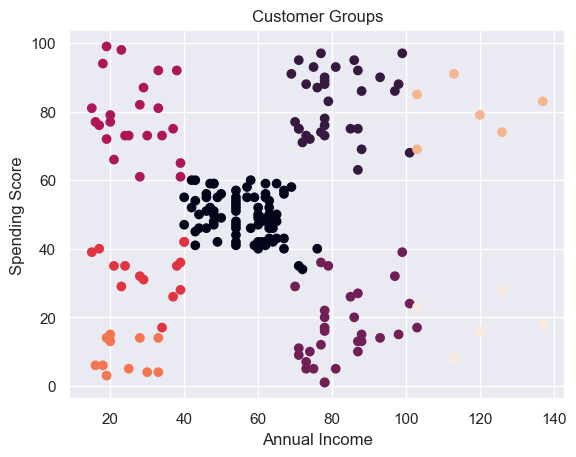

In [127]:
plt.scatter(X[:, 0], X[:, 1], c=y3)
plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

In [139]:
def getScores(X, labels):
    from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
    s1 = silhouette_score(X, labels)
    s2 = calinski_harabasz_score(X, labels)
    s3 = davies_bouldin_score(X, labels)
    return [s1,s2,s3]

In [140]:
l1 = getScores(X, y1)
l2 = getScores(X, y2)
l3 = getScores(X, y3)

In [141]:
l1, l2, l3

([0.553931997444648, 247.35899338037282, 0.5725628995597082],
 [0.5529945955148897, 243.07142892964563, 0.5782207452369454],
 [0.499893048159358, 230.55234338590262, 0.6627900498045702])

In [145]:
index = ["K-Means", "Agglomerative", "Mean Shift"]
columns = ["Silhouette Score", "Calinski Harabasz Score", "Davies Bouldin Score"]
round(pd.DataFrame([l1,l2,l3], index=index, columns=columns),4)

,Silhouette Score,Calinski Harabasz Score,Davies Bouldin Score
K-Means,0.5539,247.3590,0.5726
Agglomerative,0.5530,243.0714,0.5782
Mean Shift,0.4999,230.5523,0.6628
